### Loading and prerequesites

In [1]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import re

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_full.pkl")

### General overview over the dataset

In [3]:
df

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,777
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,718
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,618
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen m...,224
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,638
...,...,...,...,...,...,...,...,...
4360,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,an anfang drei frage können wir anderer mit ge...,276
4361,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,266
4362,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr küch...,840
4363,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,2544


In [4]:
print("First Textual Overview of the Dataset:")
print("------------------------")
print("First Publication Year:", df['publication_date'].min().year)
print("Last Publication Year:", df['publication_date'].max().year)
print("Total Number of Publications:", len(df))
print("\nNumber of Publications per Year:")
print(df['publication_year'].value_counts().sort_index())
print("\nAverage Number of Publications per Year:")
print(df['publication_year'].value_counts().mean())
print("\nNumber of different Publishers:")
print(len(df['publisher'].value_counts()))
print("\nNumber of Publications per Publisher:")
print(df['publisher'].value_counts())
print("\nAverage Number of Publications per Publisher:")
print(df['publisher'].value_counts().mean())
print("\nAverage text length in characters:")
print(df['text'].str.len().mean())
print("\nAverage text length in words:")
print(df['word_count'].mean())

First Textual Overview of the Dataset:
------------------------
First Publication Year: 1994
Last Publication Year: 2023
Total Number of Publications: 4365

Number of Publications per Year:
publication_year
1994     18
1995     20
1996     29
1997     49
1998     60
1999     97
2000    100
2001     62
2002     62
2003    147
2004    303
2005    185
2006    143
2007    121
2008    150
2009    135
2010     92
2011     98
2012    121
2013    145
2014    223
2015    182
2016    201
2017    125
2018    261
2019    233
2020    193
2021    322
2022    329
2023    159
Name: count, dtype: int64

Average Number of Publications per Year:
145.5

Number of different Publishers:
172

Number of Publications per Publisher:
publisher
taz, die tageszeitung             422
Lebensmittel Zeitung              198
Frankfurter Rundschau             165
Stuttgarter Zeitung               155
dpa-AFX ProFeed                   141
                                 ... 
SPIEGEL Wissen                      1
St.Gall

In [5]:
# Print the first and last publication date
print(df["publication_date"].min())
print(df["publication_date"].max())

1994-01-14 00:00:00
2023-04-14 00:00:00


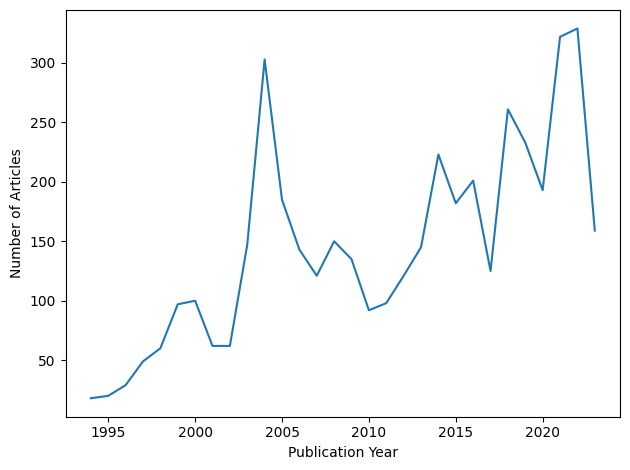

In [6]:
df['publication_year'].value_counts().sort_index().plot(legend = None)
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.savefig('../Visuals/articles_per_year.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:          article_count   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     52.27
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           7.19e-08
Time:                        09:39:39   Log-Likelihood:                -161.87
No. Observations:                  30   AIC:                             327.7
Df Residuals:                      28   BIC:                             330.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.678e+04   2339.627  

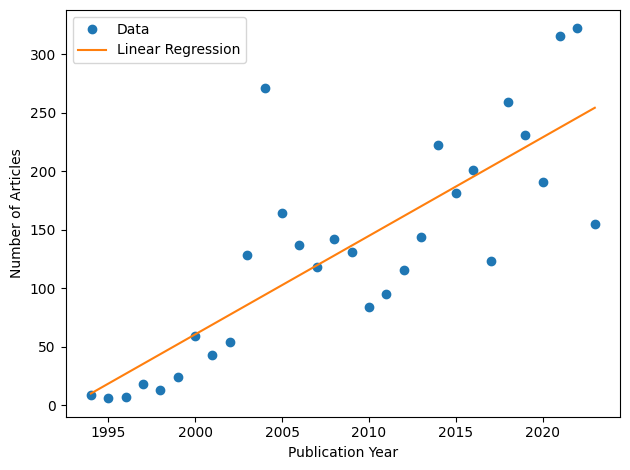

In [7]:
# Overview over yearly publications
# Calculate the number of articles published per year and add it as a column to a new dataframe
df_year = df.groupby('publication_year').count()
df_year = df_year[['title']]
df_year.columns = ['article_count']
df_year = df_year.reset_index()

# Fit a linear regression curve to the data
X = sm.add_constant(df_year['publication_year'])
y = df_year['article_count']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_year['publication_year'], y, 'o', label='Data')
plt.plot(df_year['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.savefig('../Visuals/articles_per_year_regression.png')
plt.show()

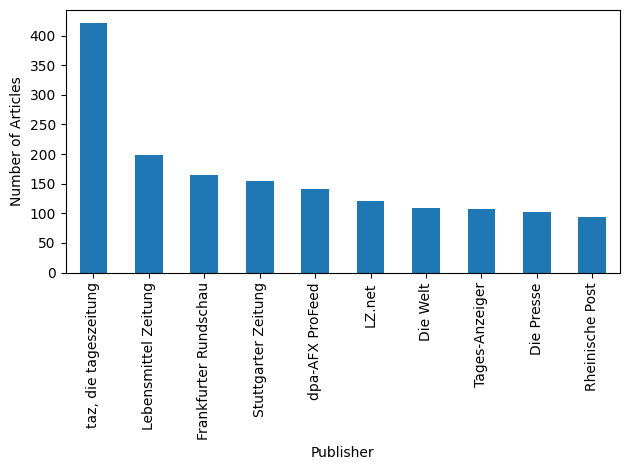

In [8]:
# Overview over publishers with most publications
df['publisher'].value_counts().nlargest(10).plot(legend = None, kind='bar',)
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.savefig('../Visuals/top_10_publishers.png')
plt.show()

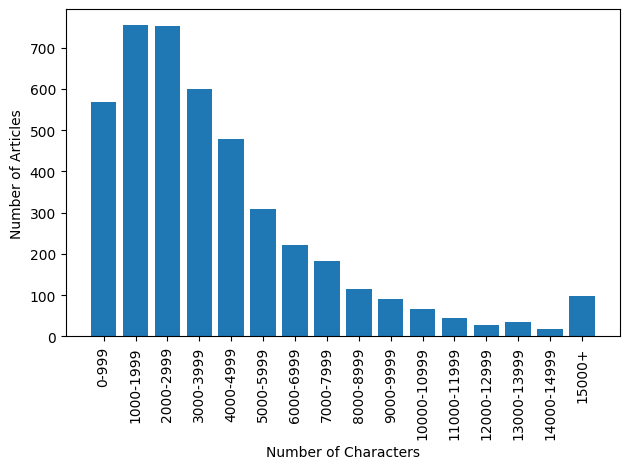

In [9]:
# Overview over articles length
# Define the intervals
intervals = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, float('inf')]

# Group the articles based on length intervals
grouped_articles = df.groupby(pd.cut(df['text'].str.len(), intervals)).size()

# Plot the bar plot
plt.bar(range(len(grouped_articles)), grouped_articles)

# Set the x-axis labels
plt.xticks(range(len(grouped_articles)), [f'{int(x.left)}-{int(x.right-1)}' if x.right != float('inf') else f'{int(x.left)}+' for x in grouped_articles.index], rotation=90)

# Set the x-axis label
plt.xlabel('Number of Characters')

# Set the y-axis label
plt.ylabel('Number of Articles')

# Save the plot
plt.savefig('../Visuals/articles_grouped_by_number_of_characters.png')

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:        avg_text_length   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     14.44
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           0.000715
Time:                        09:39:40   Log-Likelihood:                -234.26
No. Observations:                  30   AIC:                             472.5
Df Residuals:                      28   BIC:                             475.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.521e+04   2.61e+04  

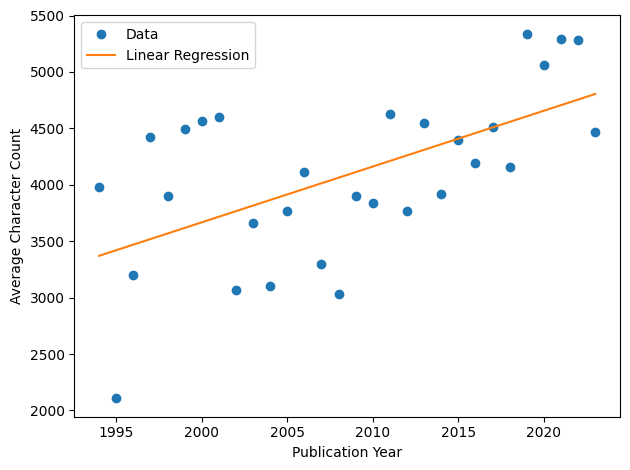

In [10]:
# Calculate the average length of text for each publication year
df_grouped = df.groupby('publication_year')['text'].apply(lambda x: x.str.len().mean()).reset_index()

# Rename the colum text to avg_text_length in the new dataframe
df_grouped.rename(columns={'text': 'avg_text_length'}, inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['avg_text_length']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Average Character Count')
plt.legend()
plt.savefig('../Visuals/yearly_text_length_characters.png')
plt.show()

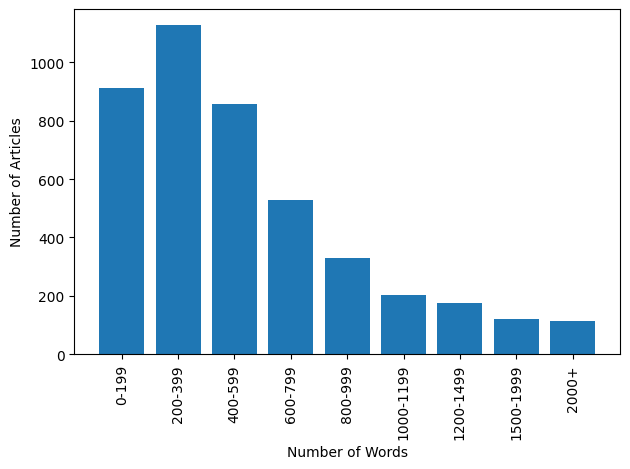

In [11]:
# Overview over articles length
# Define the intervals
intervals = [0, 200, 400, 600, 800, 1000, 1200, 1500, 2000, float('inf')]

# Group the articles based on length intervals using the column word_count
grouped_articles_word = df.groupby(pd.cut(df['word_count'], intervals)).size()

# Plot the bar plot
plt.bar(range(len(grouped_articles_word)), grouped_articles_word)

# Set the x-axis labels
plt.xticks(range(len(grouped_articles_word)), [f'{int(x.left)}-{int(x.right-1)}' if x.right != float('inf') else f'{int(x.left)}+' for x in grouped_articles_word.index], rotation=90)

# Set the x-axis label
plt.xlabel('Number of Words')

# Set the y-axis label
plt.ylabel('Number of Articles')

# Save the plot
plt.savefig('../Visuals/articles_grouped_by_number_of_words.png')

# Show the plot
plt.show()

In [12]:
# Print the average number of words per article
print(df['word_count'].mean())
# Print the number of words in the longest article
print(df['word_count'].max())
# Save the nexis_id of the longest article in a variable
longest_article = df['word_count'].idxmax()
# Print the full text, publisher and nexis_id of the longest article
print(df['publisher'][longest_article])
print(df['nexis_id'][longest_article])
print(df['text'][longest_article])
# Print the percentage of articles that have more than 1000 words
print(len(df[df['word_count'] > 1000]) / len(df))
# Print the percentage of articles that have more than 2000 words
print(len(df[df['word_count'] > 2000]) / len(df))

583.6726231386025
11667
Agrarwirtschaft 
4J4WHWW0TWTBC22D0000000
Sabine Gerlach, Achim Spiller und Christian Wocken Georg-August-Universität Göttingen 1. Trends auf dem Milchmarkt Ganz Deutschland diskutierte im Jahr 2005 über Fragen des internationalen Standortwettbewerbs und der Wettbewerbsfähigkeit, über Produktionsverlagerungen und Kostensenkungen. Ganz Deutschland? Nur die Milchwirtschaft schien davon weitgehend unberührt. Das Jahr 2005 war für die Milchbranche vornehmlich durch das Fehlen einzelner Großereignisse charakterisiert - Branchenbeobachter sprechen bereits vom Jahr der "non-events" (IDF, 2005). Zwei Begebenheiten am Jahresende lassen allerdings aufhorchen und zeigen die Richtung der weiteren Diskussion. Zum einen werden Ergebnisse eines Gutachtens im Auftrag des Raiffeisenverbandes bekannt, in dem eine radikale Strukturreform der genossenschaftlichen Molkereien gefordert wird: der Zusammenschluss zu wenigen Großmolkereien, der Kauf einer größeren Privatmolkerei, Standor

                            OLS Regression Results                            
Dep. Variable:        avg_text_length   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     18.03
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           0.000217
Time:                        09:39:40   Log-Likelihood:                -174.41
No. Observations:                  30   AIC:                             352.8
Df Residuals:                      28   BIC:                             355.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.453e+04   3552.797  

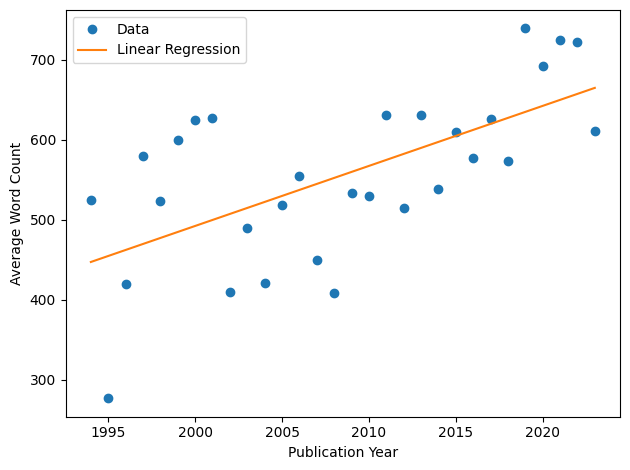

In [13]:
# Calculate the average length of text for each publication year using the column word_count
df_grouped_word = df.groupby('publication_year')['word_count'].apply(lambda x: x.mean()).reset_index()

# Rename the colum word_count to avg_text_length in the new dataframe
df_grouped_word.rename(columns={'word_count': 'avg_text_length'}, inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped_word['publication_year'])
y = df_grouped_word['avg_text_length']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped_word['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped_word['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Average Word Count')
plt.legend()
plt.savefig('../Visuals/yearly_text_length_words.png')
plt.show()

### Frequent words

In [14]:
# Use small spacy model
nlp = spacy.load("de_core_news_sm")

# Add a column with the spacy doc object for each article
df['spacy_doc'] = df['text'].apply(nlp)

spacy_doc
Lebensmittel    5758
Fleisch         5486
Produkt         4968
gentechnisch    4117
Mensch          3936
Unternehmen     3566
verändert       3250
Deutschland     3180
USA             3059
Gentechnik      2995
stehen          2824
Tier            2721
sehen           2713
EU              2338
deutsch         2335
Pflanze         2327
Markt           2292
Verbraucher     2258
finden          2177
Europa          2158
Name: count, dtype: int64


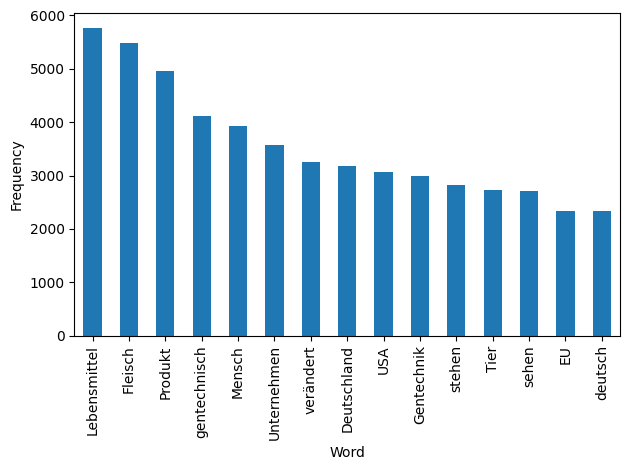

In [15]:
ignore_word_list = ["Prozent"]

# Find the most frequent words in df and their frequencies
word_freq = df['spacy_doc'].apply(lambda x: [token.lemma_ for token in x if not token.is_stop and not token.is_punct and not token.is_digit and not token.lemma_ in ignore_word_list]).explode().value_counts()
#word_freq = df['spacy_doc'].apply(lambda x: [token.lemma_ for token in x]).explode().value_counts()

# Remove whitespace-only strings
word_freq = word_freq[word_freq.index.str.strip() != '']

# Remove double lines
word_freq = word_freq[word_freq.index.str.strip() != '--']

# Workaround: Remove all texts where the words "and", "the", "to" and "of" appear more than twice.
# No longer needed since all non-german articles have been removed
#word_freq = word_freq[(word_freq.index != 'and') & (word_freq.index != 'the') & (word_freq.index != 'The') & (word_freq.index != 'to') & (word_freq.index != 'of')]
#word_freq = word_freq[word_freq > 2]

# Print the most frequent words as text
print(word_freq.nlargest(20))

# Plot the 15 most frequent words
word_freq.nlargest(15).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.savefig('../Visuals/top_15_words.png')
plt.show()

In [16]:
# Find the texts with the most occurences of "Prozent"
df['prozent_count'] = df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_ == 'Prozent']))
df['prozent_count'].nlargest(10)

# Print the texts with the most occurences of "Prozent", the frequency of the word "Prozent" and the publisher of the article
for i in df['prozent_count'].nlargest(50).index:
    print(df.loc[i]['publisher'])
    print(df.loc[i]['title'])
    print(df.loc[i]['text'])
    print(df.loc[i]['prozent_count'])
    print('------------------------')

print()

print(str(sum(df['prozent_count'] > 5)) + ' Artikel mit mehr als 5 Vorkommen von Prozent')
print(str(sum(df['prozent_count'] > 50)) + ' Artikel mit mehr als 50 Vorkommen von Prozent')


LZ.net
Marktplatz New Food: Preis für pflanzenbasierte Produkte muss sinken
Vegetarische und vegane Alternativen zu Fleisch-, Fisch- und Milchprodukten sind ein anhaltender Trend Dennoch wird leicht übersehen, dass sie noch nicht im Mainstream angekommen sind. Das liegt auch am Preis. YouGov hat exklusiv für die LZ über 2000 Verbraucher Anfang Juli zu Konsum und Präferenzen befragt. 56 Prozent der Befragten haben in den letzten Monaten keine pflanzenbasierten Lebensmittel eingekauft. Weitere 15 Prozent haben lediglich bis zu zwei Einkäufe getätigt. Die Schar der regelmäßigen Verwender ist mit 12 Prozent noch sehr überschaubar. Sie legen diese Produkte wöchentlich in ihren Einkaufskorb. Natürlich stellt sich die Frage, was verbessert werden muss, damit die Produkte mehr Anklang finden. Optimierungsbedarf sehen die Befragten nicht vorrangig beim Thema Bioqualität (23 Prozent) oder Struktur und Biss (14 Prozent), sondern beim Preis. Sie sind schlicht zu teuer. Die einfache Forderung: Alte

In [17]:
# Visualize the distribution of the number of occurences of "gentechnich" or "Gentechnik" in the articles over the years
df['gentechnik_count'] = df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_ == 'Gentechnik']))
df['gentechnik_count'] += df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_ == 'gentechnisch']))

# Introduce a new column "gentechnik_bool" which is True if the article contains the word "gentechnich" or "Gentechnik" and False otherwise
df['gentechnik_bool'] = df['gentechnik_count'] > 0

# Group by year and calculate the total number of occurences for each year
df_gentechnik = df.groupby('publication_year')['gentechnik_count'].sum().reset_index()

# Calculate the ratio of "gentechnich" or "Gentechnik" over the number of words in the articles over the years
df_gentechnik['gentechnik_ratio'] = df_gentechnik['gentechnik_count'] / df.groupby('publication_year')['text'].apply(lambda x: sum([len(token) for token in x])).reset_index()['text']

# Calculate the ratio of articles containing "gentechnich" or "Gentechnik" over the years
df_gentechnik['gentechnik_bool_ratio'] = df.groupby('publication_year')['gentechnik_bool'].mean().reset_index()['gentechnik_bool']

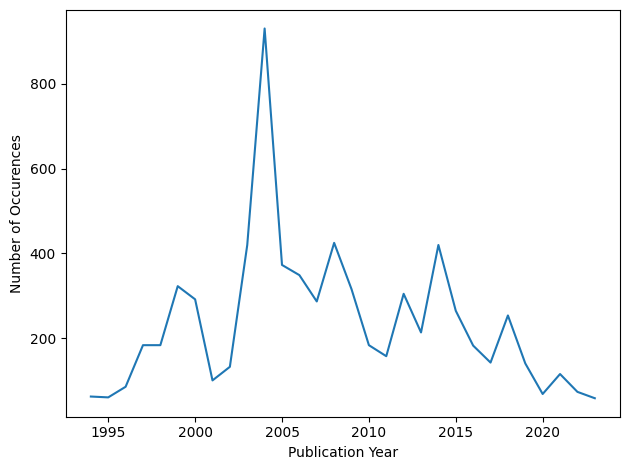

In [18]:
# Visualize the column "gentechnik_count"
df_gentechnik.plot(x='publication_year', y='gentechnik_count', legend=None)
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurences')
plt.savefig('../Visuals/gentechnik_count.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:       gentechnik_ratio   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     77.85
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           1.42e-09
Time:                        09:43:24   Log-Likelihood:                 217.64
No. Observations:                  30   AIC:                            -431.3
Df Residuals:                      28   BIC:                            -428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0667      0.008  

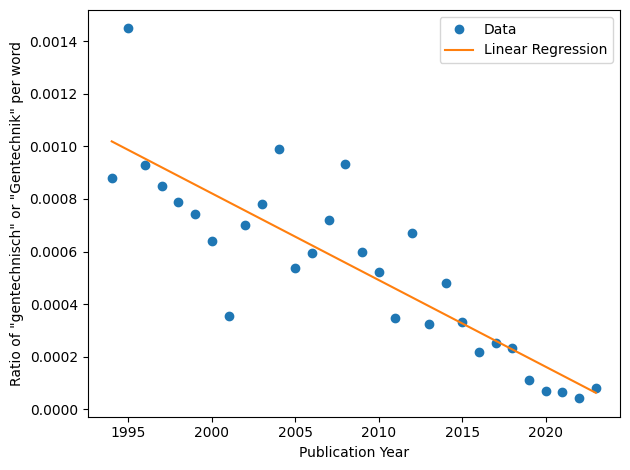

In [19]:
# Visualize the column "gentechnik_ratio"
# Fit a linear regression curve to the data
X = sm.add_constant(df_gentechnik['publication_year'])
y = df_gentechnik['gentechnik_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_gentechnik['publication_year'], y, 'o', label='Data')
plt.plot(df_gentechnik['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of "gentechnisch" or "Gentechnik" per word')
plt.legend()
plt.savefig('../Visuals/gentechnik_ratio.png')
plt.show()

                              OLS Regression Results                             
Dep. Variable:     gentechnik_bool_ratio   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     151.7
Date:                   Sat, 17 Feb 2024   Prob (F-statistic):           8.02e-13
Time:                           09:43:24   Log-Likelihood:                 29.192
No. Observations:                     30   AIC:                            -54.38
Df Residuals:                         28   BIC:                            -51.58
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

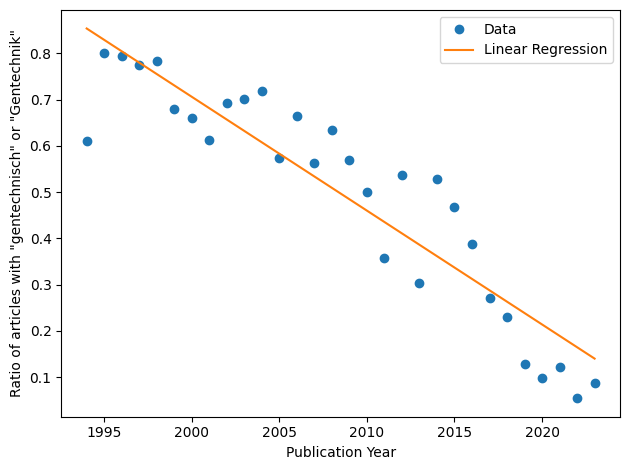

In [20]:
# Visualize the column "gentechnik_bool_ratio"
# Fit a linear regression curve to the data
X = sm.add_constant(df_gentechnik['publication_year'])
y = df_gentechnik['gentechnik_bool_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_gentechnik['publication_year'], y, 'o', label='Data')
plt.plot(df_gentechnik['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with "gentechnisch" or "Gentechnik"')
plt.legend()
plt.savefig('../Visuals/gentechnik_bool_ratio.png')
plt.show()

### Gefahr

In [21]:
# Visualize the distribution of the number of occurences of "gefährlich or "gefahr" in the articles over the years
df['gefahr_count'] = df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_.lower() == 'gefährlich']))
df['gefahr_count'] += df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_.lower() == 'gefahr']))

# Introduce a new column "gentechnik_bool" which is True if the article contains the word "gentechnich" or "Gentechnik" and False otherwise
df['gefahr_bool'] = df['gefahr_count'] > 0

# Group by year and calculate the total number of occurences for each year
df_gefahr = df.groupby('publication_year')['gefahr_count'].sum().reset_index()

# Calculate the ratio of "gentechnich" or "Gentechnik" over the number of words in the articles over the years
df_gefahr['gefahr_ratio'] = df_gefahr['gefahr_count'] / df.groupby('publication_year')['text'].apply(lambda x: sum([len(token) for token in x])).reset_index()['text']

# Calculate the ratio of articles containing "gentechnich" or "Gentechnik" over the years
df_gefahr['gefahr_bool_ratio'] = df.groupby('publication_year')['gefahr_bool'].mean().reset_index()['gefahr_bool']

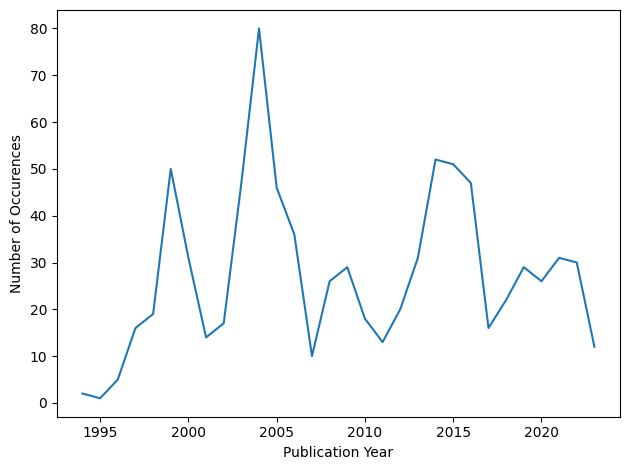

In [22]:
# Visualize the column "gefahr_count"
df_gefahr.plot(x='publication_year', y='gefahr_count', legend=None)
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurences')
plt.savefig('../Visuals/gefahr_count.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:           gefahr_ratio   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     12.52
Date:                Sat, 17 Feb 2024   Prob (F-statistic):            0.00143
Time:                        09:43:26   Log-Likelihood:                 280.59
No. Observations:                  30   AIC:                            -557.2
Df Residuals:                      28   BIC:                            -554.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0033      0.001  

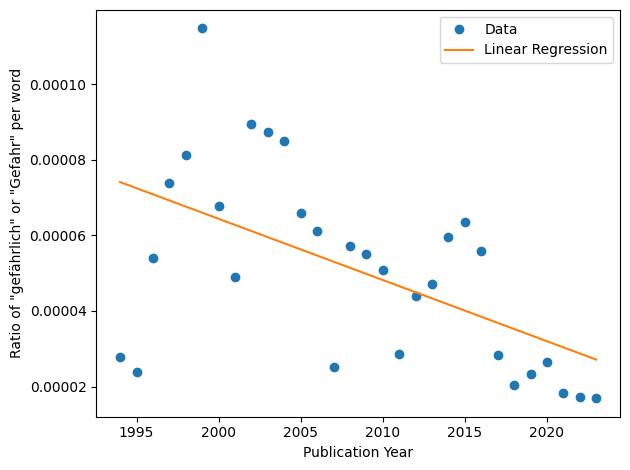

In [23]:
# Visualize the column "gefahr_ratio"
# Fit a linear regression curve to the data
X = sm.add_constant(df_gefahr['publication_year'])
y = df_gefahr['gefahr_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_gefahr['publication_year'], y, 'o', label='Data')
plt.plot(df_gefahr['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of "gefährlich" or "Gefahr" per word')
plt.legend()
plt.savefig('../Visuals/gefahr_ratio.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:      gefahr_bool_ratio   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     6.519
Date:                Sat, 17 Feb 2024   Prob (F-statistic):             0.0164
Time:                        09:43:26   Log-Likelihood:                 45.641
No. Observations:                  30   AIC:                            -87.28
Df Residuals:                      28   BIC:                            -84.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.0525      2.318  

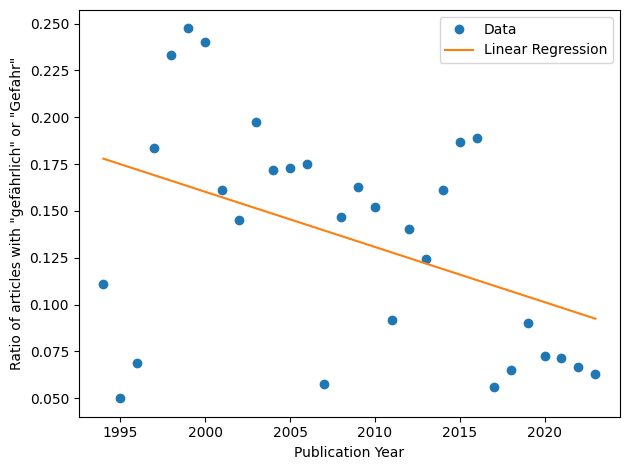

In [24]:
# Visualize the column gefahr_bool_ratio
# Fit a linear regression curve to the data
X = sm.add_constant(df_gefahr['publication_year'])
y = df_gefahr['gefahr_bool_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_gefahr['publication_year'], y, 'o', label='Data')
plt.plot(df_gefahr['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with "gefährlich" or "Gefahr"')
plt.legend()
plt.savefig('../Visuals/gefahr_bool_ratio.png')
plt.show()

### Verbot

In [28]:
# Visualize the distribution of the number of occurences of "verbot' or "verboten" in the articles over the years
df['verbot_count'] = df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_.lower() == 'verbot']))
df['verbot_count'] += df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_.lower() == 'verboten']))

# Introduce a new column "gentechnik_bool" which is True if the article contains the word "gentechnich" or "Gentechnik" and False otherwise
df['verbot_bool'] = df['verbot_count'] > 0

# Group by year and calculate the total number of occurences for each year
df_verbot = df.groupby('publication_year')['verbot_count'].sum().reset_index()

# Calculate the ratio of "gentechnich" or "Gentechnik" over the number of words in the articles over the years
df_verbot['verbot_ratio'] = df_verbot['verbot_count'] / df.groupby('publication_year')['text'].apply(lambda x: sum([len(token) for token in x])).reset_index()['text']

# Calculate the ratio of articles containing "gentechnich" or "Gentechnik" over the years
df_verbot['verbot_bool_ratio'] = df.groupby('publication_year')['verbot_bool'].mean().reset_index()['verbot_bool']

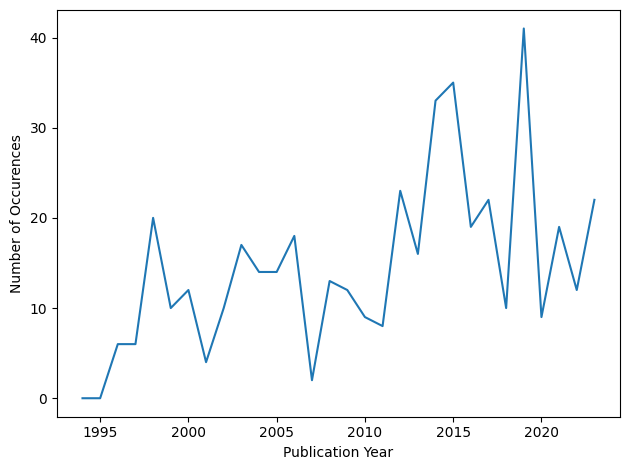

In [29]:
# Visualize the column "verbot_count"
df_verbot.plot(x='publication_year', y='verbot_count', legend=None)
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurences')
plt.savefig('../Visuals/verbot_count.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:           verbot_ratio   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.6519
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.426
Time:                        09:43:48   Log-Likelihood:                 284.48
No. Observations:                  30   AIC:                            -565.0
Df Residuals:                      28   BIC:                            -562.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0007      0.001  

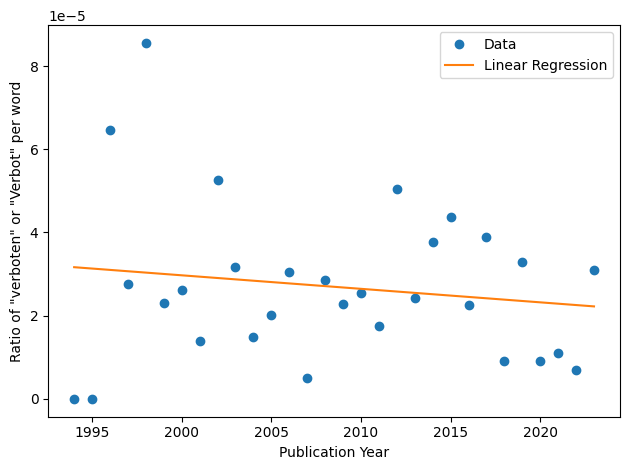

In [30]:
# Visualize the column "verbot_ratio"
# Fit a linear regression curve to the data
X = sm.add_constant(df_verbot['publication_year'])
y = df_verbot['verbot_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_verbot['publication_year'], y, 'o', label='Data')
plt.plot(df_verbot['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of "verboten" or "Verbot" per word')
plt.legend()
plt.savefig('../Visuals/verbot_ratio.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:      verbot_bool_ratio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                  0.001726
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.967
Time:                        09:43:49   Log-Likelihood:                 54.963
No. Observations:                  30   AIC:                            -105.9
Df Residuals:                      28   BIC:                            -103.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0003      1.699  

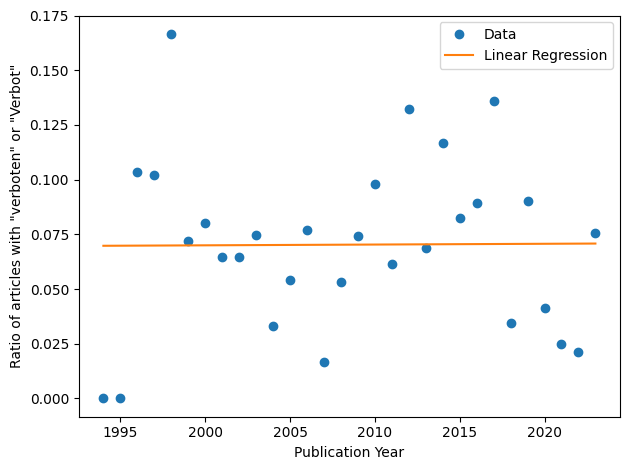

In [31]:
# Visualize the column verbot_bool_ratio
# Fit a linear regression curve to the data
X = sm.add_constant(df_verbot['publication_year'])
y = df_verbot['verbot_bool_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_verbot['publication_year'], y, 'o', label='Data')
plt.plot(df_verbot['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with "verboten" or "Verbot"')
plt.legend()
plt.savefig('../Visuals/verbot_bool_ratio.png')
plt.show()

### Klima

In [32]:
# Visualize the distribution of the number of occurences of "klima" or "klimawandel" in the articles over the years
df['klima_count'] = df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_.lower() == 'klima']))
df['klima_count'] += df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_.lower() == 'klimawandel']))

# Introduce a new column "gentechnik_bool" which is True if the article contains the word "gentechnich" or "Gentechnik" and False otherwise
df['klima_bool'] = df['klima_count'] > 0

# Group by year and calculate the total number of occurences for each year
df_klima = df.groupby('publication_year')['klima_count'].sum().reset_index()

# Calculate the ratio of "gentechnich" or "Gentechnik" over the number of words in the articles over the years
df_klima['klima_ratio'] = df_klima['klima_count'] / df.groupby('publication_year')['text'].apply(lambda x: sum([len(token) for token in x])).reset_index()['text']

# Calculate the ratio of articles containing "gentechnich" or "Gentechnik" over the years
df_klima['klima_bool_ratio'] = df.groupby('publication_year')['klima_bool'].mean().reset_index()['klima_bool']

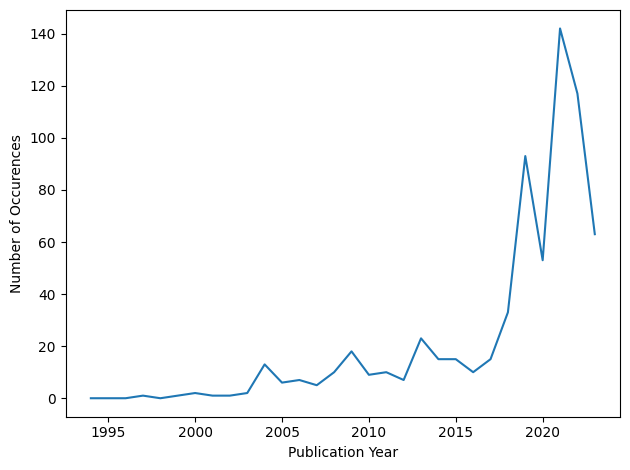

In [33]:
# Visualize the column "klima_count"
df_klima.plot(x='publication_year', y='klima_count', legend=None)
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurences')
plt.savefig('../Visuals/klima_count.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:            klima_ratio   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     63.62
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           1.10e-08
Time:                        11:10:42   Log-Likelihood:                 292.93
No. Observations:                  30   AIC:                            -581.9
Df Residuals:                      28   BIC:                            -579.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0048      0.001  

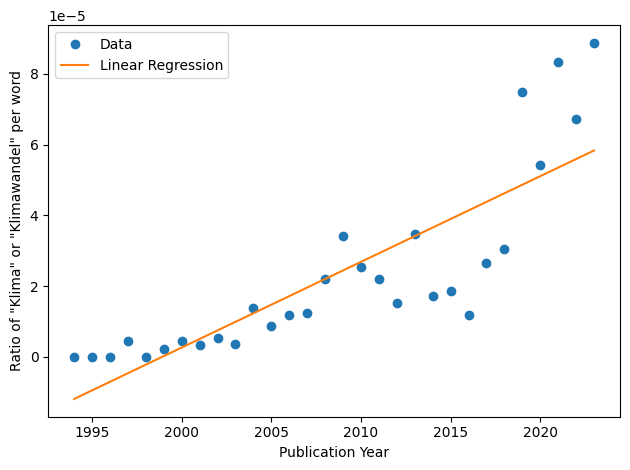

In [34]:
# Visualize the column "klima_ratio"
# Fit a linear regression curve to the data
X = sm.add_constant(df_klima['publication_year'])
y = df_klima['klima_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_klima['publication_year'], y, 'o', label='Data')
plt.plot(df_klima['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of "Klima" or "Klimawandel" per word')
plt.legend()
plt.savefig('../Visuals/klima_ratio.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:       klima_bool_ratio   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     56.73
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           3.33e-08
Time:                        11:10:42   Log-Likelihood:                 50.864
No. Observations:                  30   AIC:                            -97.73
Df Residuals:                      28   BIC:                            -94.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -14.5983      1.947  

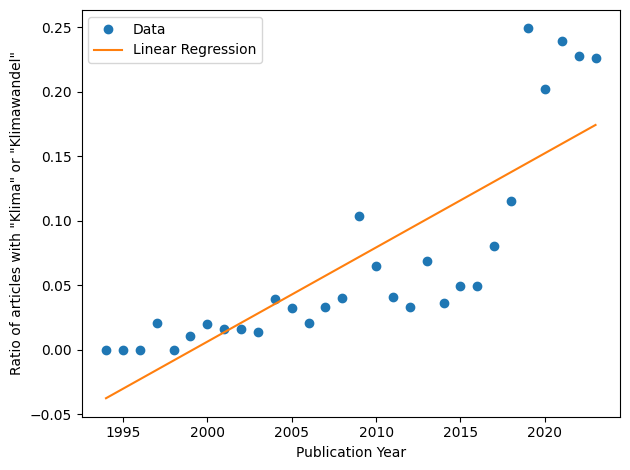

In [35]:
# Visualize the column klima_bool_ratio
# Fit a linear regression curve to the data
X = sm.add_constant(df_klima['publication_year'])
y = df_klima['klima_bool_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_klima['publication_year'], y, 'o', label='Data')
plt.plot(df_klima['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with "Klima" or "Klimawandel"')
plt.legend()
plt.savefig('../Visuals/klima_bool_ratio.png')
plt.show()

### Klimakonferenz

In [137]:
# Visualize the distribution of the number of occurences of "Konferenz" and 'Klimakonferenz' in the articles over the years
df['konferenz_count'] = df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_ == 'Konferenz']))
df['klimakonferenz_count'] = df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_ == 'Klimakonferenz']))

# Introduce two new columns "konferenz_bool" and "klimakonferenz_bool" which are True if the article contains the word "Konferenz" or "Klimakonferenz" and False otherwise
df['konferenz_bool'] = df['konferenz_count'] > 0
df['klimakonferenz_bool'] = df['klimakonferenz_count'] > 0

# Group by year and calculate the total number of occurences for each year
df_konferenz = df.groupby('publication_year')['konferenz_count'].sum().reset_index()
df_klimakonferenz = df.groupby('publication_year')['klimakonferenz_count'].sum().reset_index()

# Calculate the ratio of "konferenz" and "klimakonferenz" over the number of words in the articles over the years
df_konferenz['konferenz_ratio'] = df_konferenz['konferenz_count'] / df.groupby('publication_year')['text'].apply(lambda x: sum([len(token) for token in x])).reset_index()['text']
df_klimakonferenz['klimakonferenz_ratio'] = df_klimakonferenz['klimakonferenz_count'] / df.groupby('publication_year')['text'].apply(lambda x: sum([len(token) for token in x])).reset_index()['text']

# Calculate the ratio of articles containing "konferenz" and "klimakonferenz" over the years
df_konferenz['konferenz_bool_ratio'] = df.groupby('publication_year')['konferenz_bool'].mean().reset_index()['konferenz_bool']
df_klimakonferenz['klimakonferenz_bool_ratio'] = df.groupby('publication_year')['klimakonferenz_bool'].mean().reset_index()['klimakonferenz_bool']


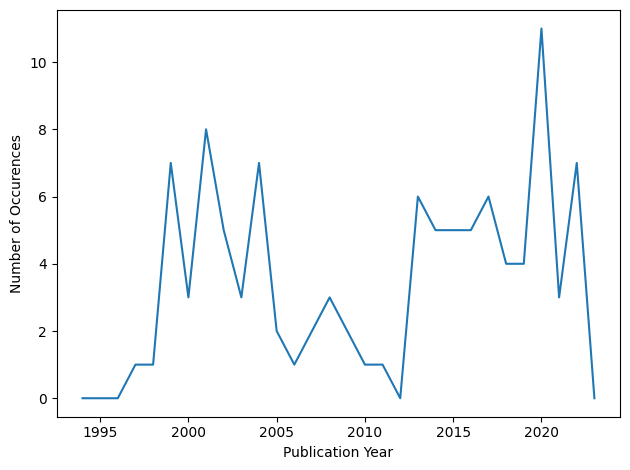

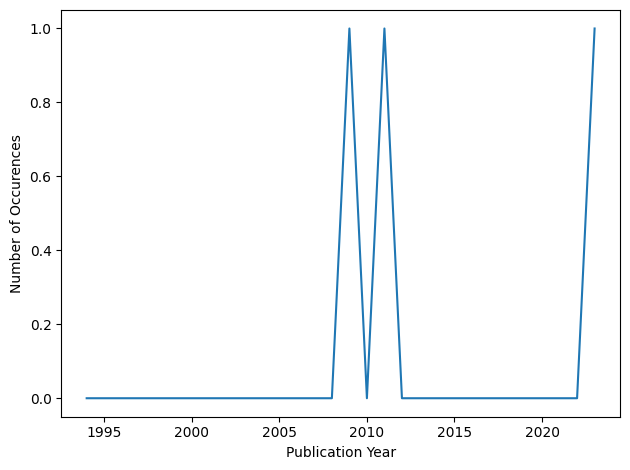

In [138]:
# Visualize the columns "konferenz_count" and "klimakonferenz_count"
df_konferenz.plot(x='publication_year', y='konferenz_count', legend=None)
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurences')
#plt.savefig('../Visuals/konferenz_count.png')
plt.show()

df_klimakonferenz.plot(x='publication_year', y='klimakonferenz_count', legend=None)
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurences')
#plt.savefig('../Visuals/klimakonferenz_count.png')
plt.show()

### Questions

In [73]:
def count_questions(text):
    return sum(1 for sent in text.sents if sent.text.strip().endswith('?'))

In [74]:
df['questions_count'] = df["spacy_doc"].apply(count_questions)

In [75]:
# Add a column with the number of characters in the text
df['characters_count'] = df['text'].str.len()

# Add a column with the ratio of questions to characters
df['questions_ratio'] = df['questions_count'] / df['characters_count']

# Add a column that is true if the article contains a question and false otherwise
df['questions_bool'] = df['questions_count'] > 0

In [76]:
df
df_sorted = df.sort_values(by='questions_ratio', ascending=False)
df_sorted

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,gentechnik_count,gentechnik_bool,questions_count,characters_count,questions_ratio,questions_bool
3631,67DH39P1JC8114CH0000000,"Vegan, aber ?Fleischerei??",2023-01-27,2023,Sächsische Zeitung Regionalausgaben,Schnitzel- und Fleischkäsebrötchen auf die Han...,schnitzel und fleischkäsebrötchen auf der hand...,588,"(Schnitzel-, und, Fleischkäsebrötchen, auf, di...",0,0,False,41,4195,0.009774,True
653,5S2T9DY1JCTWB3T40000000,1 Essen nach maß 30 31 38 41,2018-04-11,2018,Der Standard,19 24 Mythen im Faktencheck Was bringen Detox-...,mythos in faktencheck was bringen detox food c...,15,"(19, 24, Mythen, im, Faktencheck, Was, bringen...",0,0,False,1,108,0.009259,True
395,5WWBF9D1F07YK01F0000000,FOOD-NEWS,2019-08-22,2019,Bunte,Wurst- und Fleisch-alternativen EVENTLOCATION ...,wurst und fleisch alternativ eventlocation in ...,14,"(Wurst-, und, Fleisch-alternativen, EVENTLOCAT...",0,0,False,1,108,0.009259,True
778,7XMCMWY12RKCK2JP0000000,Der Mai ist nicht gekommen Von Harald Martenstein,2010-01-24,2010,Der Tagesspiegel,Im Mai wird die Sonne scheinen - ganz bestimmt...,in mai werden der sonne scheinen ganz bestimme...,385,"(Im, Mai, wird, die, Sonne, scheinen, -, ganz,...",0,0,False,20,2371,0.008435,True
4357,5NV18G31F15WB0890000000,FORSCHUNG & TECHNIK,2017-06-20,2017,ZEIT Wissen,"Tanker, Frachter, Piraten: Auf dem Meer ist wa...",tanker frachter pirat auf der meer sein was lo...,281,"(Tanker, ,, Frachter, ,, Piraten, :, Auf, dem,...",0,0,False,14,1918,0.007299,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,63K4MX51F06WT01C0000000,Fleischmarkt: Erzeuger sprechen von einer der ...,2021-09-10,2021,LZ.net,Der begrenzte Fleischabsatz und ein europaweit...,der begrenzt fleischabsatz und ein europaweit ...,573,"(Der, begrenzte, Fleischabsatz, und, ein, euro...",1,0,False,0,4344,0.000000,False
2419,63M0HMF1JCRV301K0000000,Fleisch aus dem Labor: Iglo-Mutter kooperiert ...,2021-09-14,2021,LZ.net,Iglo-Mutter Nomad Foods will Fuß im Markt für ...,iglo mutter nomad foods wollen fuß in markt fü...,241,"(Iglo-Mutter, Nomad, Foods, will, Fuß, im, Mar...",0,0,False,0,1836,0.000000,False
2420,63MDG251JCRV31DG0000000,Kultiviertes Fleisch und Co.: Schweizer Herste...,2021-09-16,2021,LZ.net,Vier Schweizer Nahrungsmittelhersteller haben ...,vier schweizer nahrungsmittelhersteller haben ...,587,"(Vier, Schweizer, Nahrungsmittelhersteller, ha...",1,0,False,0,4566,0.000000,False
2421,63NX85W1JCRV339T0000000,Kultiviertes Fleisch: Leonardo DiCaprio beteil...,2021-09-23,2021,LZ.net,Kultiviertes Fleisch gewinnt außerhalb der Ern...,kultiviertes fleisch gewinnen außerhalb der er...,334,"(Kultiviertes, Fleisch, gewinnt, außerhalb, de...",0,0,False,0,2436,0.000000,False


                            OLS Regression Results                            
Dep. Variable:        questions_ratio   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     18.00
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           0.000219
Time:                        10:06:44   Log-Likelihood:                -19.343
No. Observations:                  30   AIC:                             42.69
Df Residuals:                      28   BIC:                             45.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -84.1946     20.221  

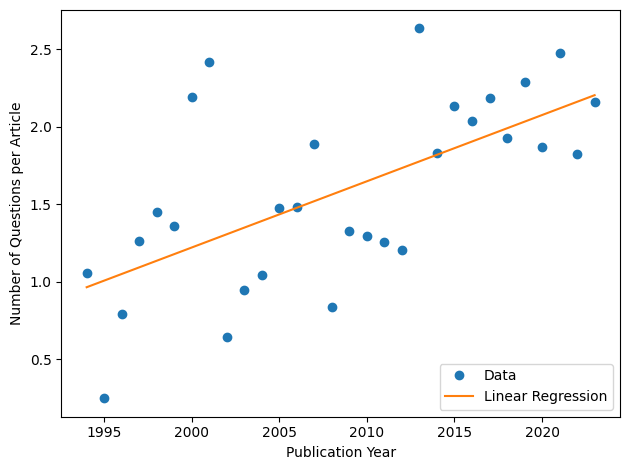

In [77]:
# Visualize the number of questions per article per year and fit a linear regression curve to the data
# Group by year and calculate the total number of questions and total number of articles for each year
df_grouped = df.groupby('publication_year').agg({'questions_count': 'sum', 'text': 'count'})

# Calculate the ratio of questions to total articles for each year
df_grouped['questions_ratio'] = df_grouped['questions_count'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['questions_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Number of Questions per Article')
plt.legend()
plt.savefig('../Visuals/questions_ratio_per_text.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:        questions_ratio   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     10.49
Date:                Thu, 15 Feb 2024   Prob (F-statistic):            0.00309
Time:                        10:06:44   Log-Likelihood:                 235.48
No. Observations:                  30   AIC:                            -467.0
Df Residuals:                      28   BIC:                            -464.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0130      0.004  

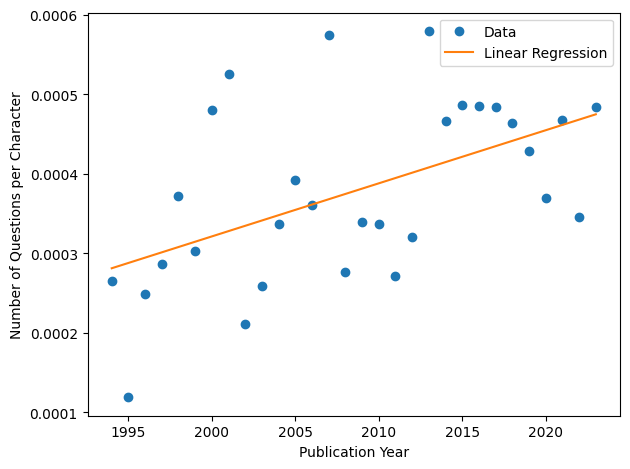

In [78]:
# Visualize the ratio of questions to characters per year and fit a linear regression curve to the data
# Group by year and calculate the total number of questions and total number of characters for each year
df_grouped = df.groupby('publication_year').agg({'questions_count': 'sum', 'characters_count': 'sum'})

# Calculate the ratio of questions to total characters for each year
df_grouped['questions_ratio'] = df_grouped['questions_count'] / df_grouped['characters_count']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['questions_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Number of Questions per Character')
plt.legend()
plt.savefig('../Visuals/questions_ratio_per_character.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:         questions_bool   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     6.858
Date:                Thu, 15 Feb 2024   Prob (F-statistic):             0.0141
Time:                        10:06:44   Log-Likelihood:                 37.935
No. Observations:                  30   AIC:                            -71.87
Df Residuals:                      28   BIC:                            -69.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.5028      2.996  

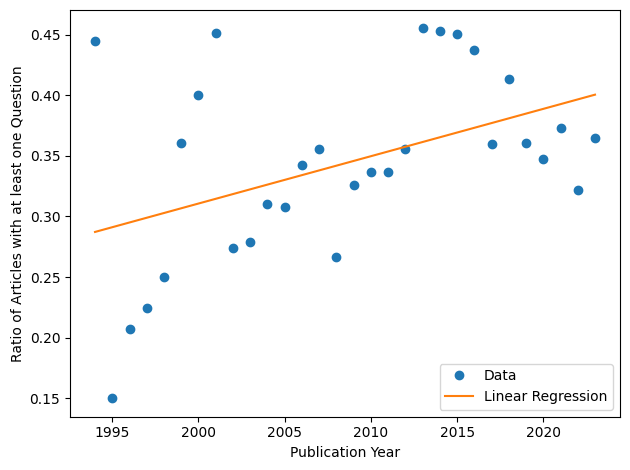

In [79]:
# Visualize the existence of questions per year and fit a linear regression curve to the data
# Group by year and calculate the total number of questions and total number of characters for each year
df_grouped = df.groupby('publication_year').agg({'questions_bool': 'mean'})

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['questions_bool']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with at least one Question')
plt.legend()
plt.savefig('../Visuals/questions_bool_articles.png')
plt.show()

### Pronouns with spacy

In [80]:
#df = pd.read_pickle("../Data/df_full.pkl")

# Use small spacy model
nlp = spacy.load('de_core_news_sm')

df

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,gentechnik_count,gentechnik_bool,questions_count,characters_count,questions_ratio,questions_bool
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,777,"(Wenn, Großbritannien, Ende, März, den, Aussti...",7,0,False,1,5529,0.000181,True
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,718,"(Fleisch, aus, dem, Labor, ist, noch, eine, Zu...",0,0,False,0,5177,0.000000,False
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,618,"(Die, AP, Weltnachrichten, haben, heute, unter...",0,0,False,0,4622,0.000000,False
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen m...,224,"(Maastricht, (, AP, ), -, Das, niederländische...",0,0,False,0,1575,0.000000,False
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,638,"(Die, Weltbevölkerung, wächst, ,, die, Nachfra...",2,0,False,0,4588,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,an anfang drei frage können wir anderer mit ge...,276,"(6, Am, anfang, drei, Fragen, 1., Können, wir,...",0,0,False,12,1866,0.006431,True
4361,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,266,"(Ein, saftiges, Filet, ,, für, das, kein, Huhn...",0,0,False,0,1849,0.000000,False
4362,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr küch...,840,"(John, Dickie, :, », Delizia, !, Die, Italiene...",0,0,False,2,6061,0.000330,True
4363,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,2544,"(Es, ist, der, letzte, Tag, auf, der, Lebensmi...",3,2,True,8,18345,0.000436,True


In [81]:
# Add new columns to the dataframe called 'word_count', 'du_count', 'ihr_count', 'du_ihr_count', 'sie_count', 'all_count'
df['word_count'] = 0
df['du_count'] = 0
df['ihr_count'] = 0
df['du_ihr_count'] = 0
df['sie_count'] = 0
df['all_count'] = 0

# Add new columns to the dataframe called 'has_du', 'has_ihr', 'has_du_ihr', 'has_sie', 'has_all'
df['has_du'] = False
df['has_ihr'] = False
df['has_du_ihr'] = False
df['has_sie'] = False
df['has_all'] = False


# Define the variants of 'Du', 'Ihr' and 'Sie' in German
du_variants = ['du', 'dich', 'dein', 'deine', 'deines', 'deiner', 'dir']
ihr_variants = ['ihr', 'euch', 'euer', 'eure', 'eures', 'eurer', 'eur']
sie_variants = ['sie', 'ihr', 'ihrer', 'ihre', 'ihres', 'ihnen']

# Iterate over the dataframe and count the number of words, 'Du', 'Ihr' and 'Du' and 'Ihr' in each text
for index in df.index:
    doc = nlp(df['clean_text'][index])
    df.loc[index, 'word_count'] = len(doc)
    df.loc[index, 'du_count'] = sum([1 for token in doc if token.text in du_variants])
    df.loc[index, 'ihr_count'] = sum([1 for token in doc if token.text in ihr_variants])
    df.loc[index, 'du_ihr_count'] = df.loc[index, 'du_count'] + df.loc[index, 'ihr_count']
    df.loc[index, 'sie_count'] = sum([1 for token in doc if token.text in sie_variants])
    df.loc[index, 'all_count'] = df.loc[index, 'du_count'] + df.loc[index, 'ihr_count'] + df.loc[index, 'sie_count']

    # Fill the columns with True if the text contains one of them
    if df.loc[index, 'du_count'] > 0:
        df.loc[index, 'has_du'] = True
    if df.loc[index, 'ihr_count'] > 0:
        df.loc[index, 'has_ihr'] = True
    if df.loc[index, 'du_ihr_count'] > 0:
        df.loc[index, 'has_du_ihr'] = True
    if df.loc[index, 'sie_count'] > 0:
        df.loc[index, 'has_sie'] = True
    if df.loc[index, 'all_count'] > 0:
        df.loc[index, 'has_all'] = True

df

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,...,du_count,ihr_count,du_ihr_count,sie_count,all_count,has_du,has_ihr,has_du_ihr,has_sie,has_all
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,777,"(Wenn, Großbritannien, Ende, März, den, Aussti...",7,...,0,5,5,6,11,False,True,True,True,True
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,718,"(Fleisch, aus, dem, Labor, ist, noch, eine, Zu...",0,...,0,1,1,5,6,False,True,True,True,True
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,618,"(Die, AP, Weltnachrichten, haben, heute, unter...",0,...,0,4,4,7,11,False,True,True,True,True
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen m...,224,"(Maastricht, (, AP, ), -, Das, niederländische...",0,...,0,0,0,0,0,False,False,False,False,False
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,638,"(Die, Weltbevölkerung, wächst, ,, die, Nachfra...",2,...,0,0,0,1,1,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,an anfang drei frage können wir anderer mit ge...,276,"(6, Am, anfang, drei, Fragen, 1., Können, wir,...",0,...,1,1,2,5,7,True,True,True,True,True
4361,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,266,"(Ein, saftiges, Filet, ,, für, das, kein, Huhn...",0,...,0,0,0,1,1,False,False,False,True,True
4362,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr küch...,840,"(John, Dickie, :, », Delizia, !, Die, Italiene...",0,...,0,6,6,18,24,False,True,True,True,True
4363,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,2544,"(Es, ist, der, letzte, Tag, auf, der, Lebensmi...",3,...,0,12,12,27,39,False,True,True,True,True


In [82]:
df_yearly_overview = pd.DataFrame(columns=['publication_year', 'publication_count', 'word_count', 'du_count', 'ihr_count', 'du_ihr_count', 'sie_count', 'all_count'])

# Fill the dataframe with the data
for index in df.index:
    year = df["publication_year"][index]
    if year not in df_yearly_overview['publication_year'].values:
        df_yearly_overview = pd.concat([df_yearly_overview, pd.DataFrame({'publication_year': year, 'publication_count': 0, 'word_count': 0, 'du_count': 0, 'ihr_count': 0, 'du_ihr_count': 0, 'sie_count': 0, 'all_count': 0}, index=[0])])
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'publication_count'] += 1
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'word_count'] += df["word_count"][index]
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'du_count'] += df["du_count"][index]
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'ihr_count'] += df["ihr_count"][index]
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'du_ihr_count'] += df["du_ihr_count"][index]
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'sie_count'] += df["sie_count"][index]
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'all_count'] += df["all_count"][index]

# Sort the dataframe by publication_year
df_yearly_overview = df_yearly_overview.sort_values(by='publication_year')

# Reindex the dataframe
df_yearly_overview = df_yearly_overview.reset_index(drop=True)

df_yearly_overview

,publication_year,publication_count,word_count,du_count,ihr_count,du_ihr_count,sie_count,all_count
0,1994,18,9436,0,59,59,138,197
1,1995,20,5534,2,25,27,49,76
2,1996,29,12168,0,27,27,84,111
3,1997,49,28417,0,86,86,252,338
4,1998,60,31443,18,103,121,316,437
5,1999,97,58198,4,220,224,613,837
6,2000,100,62522,8,268,276,697,973
7,2001,62,38884,14,166,180,433,613
8,2002,62,25364,1,98,99,235,334
9,2003,147,72026,3,323,326,717,1043


In [83]:
# Add newcolumns to the dataframe
df_yearly_overview['articles_with_du_count'] = 0
df_yearly_overview['articles_without_du_count'] = 0
df_yearly_overview['articles_with_ihr_count'] = 0
df_yearly_overview['articles_without_ihr_count'] = 0
df_yearly_overview['articles_with_du_ihr_count'] = 0
df_yearly_overview['articles_without_du_ihr_count'] = 0
df_yearly_overview['articles_with_sie_count'] = 0
df_yearly_overview['articles_without_sie_count'] = 0
df_yearly_overview['articles_with_all_count'] = 0
df_yearly_overview['articles_without_all_count'] = 0

# Iterate over df and count the number of articles with and without 'Du' in each year and fill the data into df_yearly_overview
for index in df.index:
    year = df["publication_year"][index]
    if df["has_du"][index]:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_with_du_count'] += 1
    else:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_without_du_count'] += 1
    if df["has_ihr"][index]:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_with_ihr_count'] += 1
    else:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_without_ihr_count'] += 1
    if df["has_du_ihr"][index]:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_with_du_ihr_count'] += 1
    else:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_without_du_ihr_count'] += 1
    if df["has_sie"][index]:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_with_sie_count'] += 1
    else:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_without_sie_count'] += 1
    if df["has_all"][index]:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_with_all_count'] += 1
    else:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_without_all_count'] += 1

# Add new columns to the dataframe df_yearly_overview
df_yearly_overview['articles_with_du_ratio'] = 0
df_yearly_overview['articles_with_ihr_ratio'] = 0
df_yearly_overview['articles_with_du_ihr_ratio'] = 0
df_yearly_overview['articles_with_sie_ratio'] = 0
df_yearly_overview['articles_with_all_ratio'] = 0


# Calculate the ratios and fill the data into df_yearly_overview
for index in df_yearly_overview.index:
    df_yearly_overview.loc[index, 'articles_with_du_ratio'] = df_yearly_overview.loc[index, 'articles_with_du_count'] / df_yearly_overview.loc[index, 'publication_count']
    df_yearly_overview.loc[index, 'articles_with_ihr_ratio'] = df_yearly_overview.loc[index, 'articles_with_ihr_count'] / df_yearly_overview.loc[index, 'publication_count']
    df_yearly_overview.loc[index, 'articles_with_du_ihr_ratio'] = df_yearly_overview.loc[index, 'articles_with_du_ihr_count'] / df_yearly_overview.loc[index, 'publication_count']
    df_yearly_overview.loc[index, 'articles_with_sie_ratio'] = df_yearly_overview.loc[index, 'articles_with_sie_count'] / df_yearly_overview.loc[index, 'publication_count']
    df_yearly_overview.loc[index, 'articles_with_all_ratio'] = df_yearly_overview.loc[index, 'articles_with_all_count'] / df_yearly_overview.loc[index, 'publication_count']

df_yearly_overview

,publication_year,publication_count,word_count,du_count,ihr_count,du_ihr_count,sie_count,all_count,articles_with_du_count,articles_without_du_count,...,articles_without_du_ihr_count,articles_with_sie_count,articles_without_sie_count,articles_with_all_count,articles_without_all_count,articles_with_du_ratio,articles_with_ihr_ratio,articles_with_du_ihr_ratio,articles_with_sie_ratio,articles_with_all_ratio
0,1994,18,9436,0,59,59,138,197,0,18,...,7,15,3,15,3,0.000000,0.611111,0.611111,0.833333,0.833333
1,1995,20,5534,2,25,27,49,76,1,19,...,9,15,5,16,4,0.050000,0.500000,0.550000,0.750000,0.800000
2,1996,29,12168,0,27,27,84,111,0,29,...,15,22,7,22,7,0.000000,0.482759,0.482759,0.758621,0.758621
3,1997,49,28417,0,86,86,252,338,0,49,...,18,45,4,45,4,0.000000,0.632653,0.632653,0.918367,0.918367
4,1998,60,31443,18,103,121,316,437,3,57,...,24,51,9,51,9,0.050000,0.600000,0.600000,0.850000,0.850000
5,1999,97,58198,4,220,224,613,837,4,93,...,36,86,11,86,11,0.041237,0.628866,0.628866,0.886598,0.886598
6,2000,100,62522,8,268,276,697,973,5,95,...,22,82,18,82,18,0.050000,0.780000,0.780000,0.820000,0.820000
7,2001,62,38884,14,166,180,433,613,6,56,...,25,51,11,52,10,0.096774,0.580645,0.596774,0.822581,0.838710
8,2002,62,25364,1,98,99,235,334,1,61,...,23,49,13,49,13,0.016129,0.629032,0.629032,0.790323,0.790323
9,2003,147,72026,3,323,326,717,1043,2,145,...,43,120,27,120,27,0.013605,0.707483,0.707483,0.816327,0.816327


In [84]:
# Calculate the ratio of count_du to total publications for each year
df_yearly_overview['du_ratio_per_article'] = df_yearly_overview['du_count'] / df_yearly_overview['publication_count']

# Calculate the ratio of count_ihr to total publications for each year
df_yearly_overview['ihr_ratio_per_article'] = df_yearly_overview['ihr_count'] / df_yearly_overview['publication_count']

# Calculate the ratio of count_du_ihr to total publications for each year
df_yearly_overview['du_ihr_ratio_per_article'] = df_yearly_overview['du_ihr_count'] / df_yearly_overview['publication_count']

# Calculate the ratio of count_sie to total publications for each year
df_yearly_overview['sie_ratio_per_article'] = df_yearly_overview['sie_count'] / df_yearly_overview['publication_count']

# Calculate the ratio of count_all to total publications for each year
df_yearly_overview['all_ratio_per_article'] = df_yearly_overview['all_count'] / df_yearly_overview['publication_count']

# Calculate the ratio of count_du to total words for each year
df_yearly_overview['du_ratio_per_word'] = df_yearly_overview['du_count'] / df_yearly_overview['word_count']

# Calculate the ratio of count_ihr to total words for each year
df_yearly_overview['ihr_ratio_per_word'] = df_yearly_overview['ihr_count'] / df_yearly_overview['word_count']

# Calculate the ratio of count_du_ihr to total words for each year
df_yearly_overview['du_ihr_ratio_per_word'] = df_yearly_overview['du_ihr_count'] / df_yearly_overview['word_count']

# Calculate the ratio of count_sie to total words for each year
df_yearly_overview['sie_ratio_per_word'] = df_yearly_overview['sie_count'] / df_yearly_overview['word_count']

# Calculate the ratio of count_all to total words for each year
df_yearly_overview['all_ratio_per_word'] = df_yearly_overview['all_count'] / df_yearly_overview['word_count']

df_yearly_overview

,publication_year,publication_count,word_count,du_count,ihr_count,du_ihr_count,sie_count,all_count,articles_with_du_count,articles_without_du_count,...,du_ratio_per_article,ihr_ratio_per_article,du_ihr_ratio_per_article,sie_ratio_per_article,all_ratio_per_article,du_ratio_per_word,ihr_ratio_per_word,du_ihr_ratio_per_word,sie_ratio_per_word,all_ratio_per_word
0,1994,18,9436,0,59,59,138,197,0,18,...,0.0,3.277778,3.277778,7.666667,10.944444,0.0,0.006253,0.006253,0.014625,0.020877
1,1995,20,5534,2,25,27,49,76,1,19,...,0.1,1.25,1.35,2.45,3.8,0.000361,0.004518,0.004879,0.008854,0.013733
2,1996,29,12168,0,27,27,84,111,0,29,...,0.0,0.931034,0.931034,2.896552,3.827586,0.0,0.002219,0.002219,0.006903,0.009122
3,1997,49,28417,0,86,86,252,338,0,49,...,0.0,1.755102,1.755102,5.142857,6.897959,0.0,0.003026,0.003026,0.008868,0.011894
4,1998,60,31443,18,103,121,316,437,3,57,...,0.3,1.716667,2.016667,5.266667,7.283333,0.000572,0.003276,0.003848,0.01005,0.013898
5,1999,97,58198,4,220,224,613,837,4,93,...,0.041237,2.268041,2.309278,6.319588,8.628866,0.000069,0.00378,0.003849,0.010533,0.014382
6,2000,100,62522,8,268,276,697,973,5,95,...,0.08,2.68,2.76,6.97,9.73,0.000128,0.004286,0.004414,0.011148,0.015563
7,2001,62,38884,14,166,180,433,613,6,56,...,0.225806,2.677419,2.903226,6.983871,9.887097,0.00036,0.004269,0.004629,0.011136,0.015765
8,2002,62,25364,1,98,99,235,334,1,61,...,0.016129,1.580645,1.596774,3.790323,5.387097,0.000039,0.003864,0.003903,0.009265,0.013168
9,2003,147,72026,3,323,326,717,1043,2,145,...,0.020408,2.197279,2.217687,4.877551,7.095238,0.000042,0.004484,0.004526,0.009955,0.014481


### Overview over the usage of 'Du'

                             OLS Regression Results                             
Dep. Variable:     du_ratio_per_article   R-squared:                       0.050
Model:                              OLS   Adj. R-squared:                  0.017
Method:                   Least Squares   F-statistic:                     1.487
Date:                  Thu, 15 Feb 2024   Prob (F-statistic):              0.233
Time:                          10:10:31   Log-Likelihood:                 35.489
No. Observations:                    30   AIC:                            -66.98
Df Residuals:                        28   BIC:                            -64.18
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

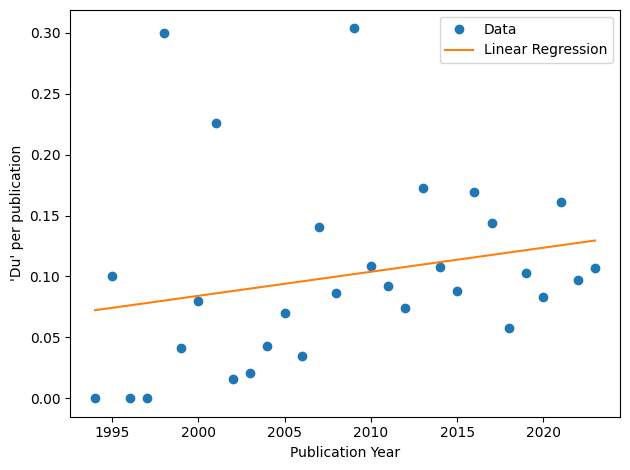

In [85]:
# Visualize the data of 'Du' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ratio_per_article']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' per publication')
plt.legend()
plt.savefig('../Visuals/count_du_per_publication.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:      du_ratio_per_word   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.1126
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.740
Time:                        10:10:31   Log-Likelihood:                 223.24
No. Observations:                  30   AIC:                            -442.5
Df Residuals:                      28   BIC:                            -439.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0019      0.006  

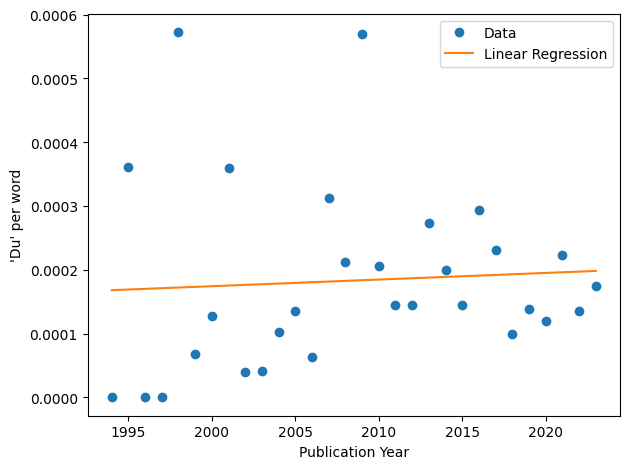

In [86]:
# Visualize the data of 'Du' per word
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ratio_per_word']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' per word')
plt.legend()
plt.savefig('../Visuals/count_du_per_word.png')
plt.show()

                              OLS Regression Results                              
Dep. Variable:     articles_with_du_ratio   R-squared:                       0.088
Model:                                OLS   Adj. R-squared:                  0.055
Method:                     Least Squares   F-statistic:                     2.700
Date:                    Thu, 15 Feb 2024   Prob (F-statistic):              0.112
Time:                            10:10:31   Log-Likelihood:                 73.437
No. Observations:                      30   AIC:                            -142.9
Df Residuals:                          28   BIC:                            -140.1
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


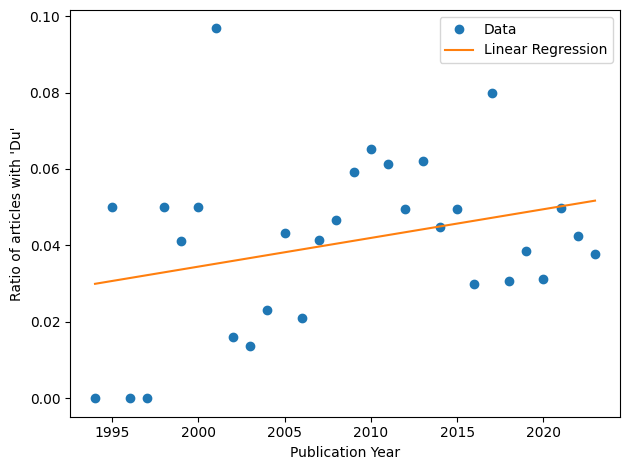

In [87]:
# Visualize the data of articles with 'Du' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['articles_with_du_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with \'Du\'')
plt.legend()
plt.savefig('../Visuals/articles_with_du_ratrio.png')
plt.show()

### Overview over the usage of 'Ihr'

                              OLS Regression Results                             
Dep. Variable:     ihr_ratio_per_article   R-squared:                       0.004
Model:                               OLS   Adj. R-squared:                 -0.031
Method:                    Least Squares   F-statistic:                    0.1255
Date:                   Thu, 15 Feb 2024   Prob (F-statistic):              0.726
Time:                           10:10:31   Log-Likelihood:                -20.389
No. Observations:                     30   AIC:                             44.78
Df Residuals:                         28   BIC:                             47.58
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

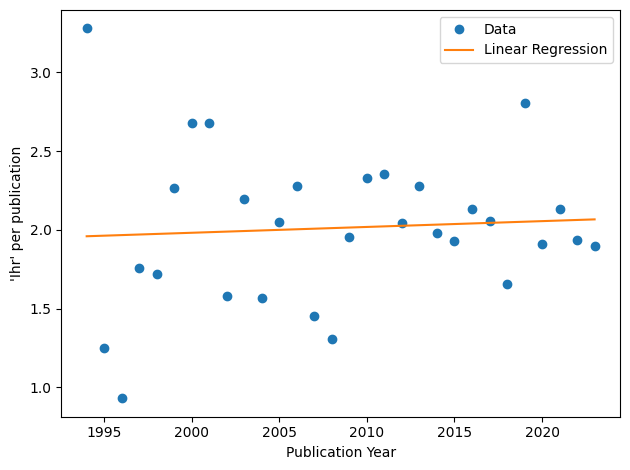

In [88]:
# Visualize the data of 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['ihr_ratio_per_article']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Ihr\' per publication')
plt.legend()
plt.savefig('../Visuals/count_ihr_per_publication.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:     ihr_ratio_per_word   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7.553
Date:                Thu, 15 Feb 2024   Prob (F-statistic):             0.0104
Time:                        10:10:32   Log-Likelihood:                 177.23
No. Observations:                  30   AIC:                            -350.5
Df Residuals:                      28   BIC:                            -347.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0829      0.029  

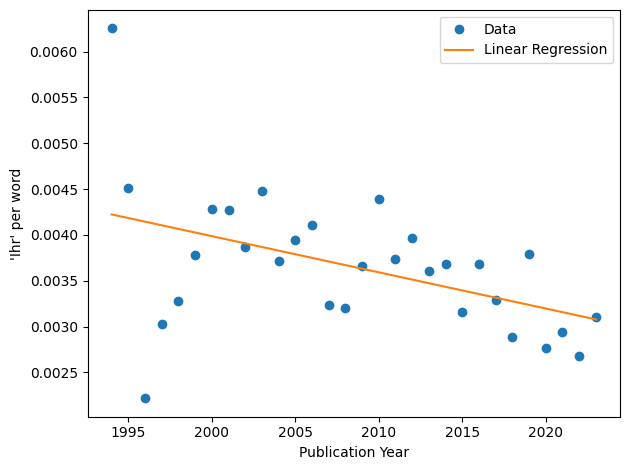

In [89]:
# Visualize the data of 'Ihr' per word
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['ihr_ratio_per_word']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Ihr\' per word')
plt.legend()
plt.savefig('../Visuals/count_ihr_per_word.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     articles_with_ihr_ratio   R-squared:                       0.107
Model:                                 OLS   Adj. R-squared:                  0.075
Method:                      Least Squares   F-statistic:                     3.352
Date:                     Thu, 15 Feb 2024   Prob (F-statistic):             0.0778
Time:                             10:10:32   Log-Likelihood:                 41.122
No. Observations:                       30   AIC:                            -78.24
Df Residuals:                           28   BIC:                            -75.44
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

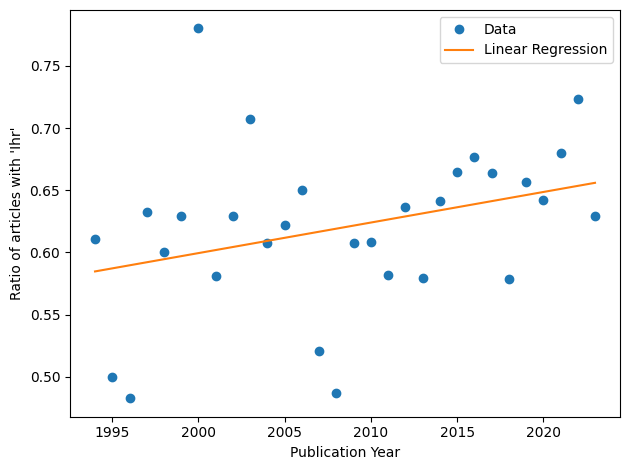

In [90]:
# Visualize the data of articles with 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['articles_with_ihr_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with \'Ihr\'')
plt.legend()
plt.savefig('../Visuals/articles_with_ihr_ratrio.png')
plt.show()

### Overview over the usage of 'Du' / 'Ihr'

                               OLS Regression Results                               
Dep. Variable:     du_ihr_ratio_per_article   R-squared:                       0.010
Model:                                  OLS   Adj. R-squared:                 -0.025
Method:                       Least Squares   F-statistic:                    0.2848
Date:                      Thu, 15 Feb 2024   Prob (F-statistic):              0.598
Time:                              10:10:32   Log-Likelihood:                -20.942
No. Observations:                        30   AIC:                             45.88
Df Residuals:                            28   BIC:                             48.69
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

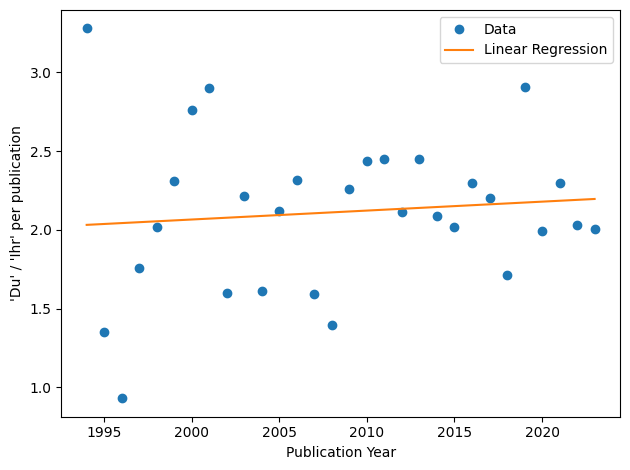

In [91]:
# Visualize the data of 'Du' and 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ihr_ratio_per_article']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' / \'Ihr\' per publication')
plt.legend()
plt.savefig('../Visuals/count_du_ihr_per_publication.png')
plt.show()

                              OLS Regression Results                             
Dep. Variable:     du_ihr_ratio_per_word   R-squared:                       0.198
Model:                               OLS   Adj. R-squared:                  0.170
Method:                    Least Squares   F-statistic:                     6.927
Date:                   Thu, 15 Feb 2024   Prob (F-statistic):             0.0137
Time:                           10:10:32   Log-Likelihood:                 176.73
No. Observations:                     30   AIC:                            -349.5
Df Residuals:                         28   BIC:                            -346.7
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

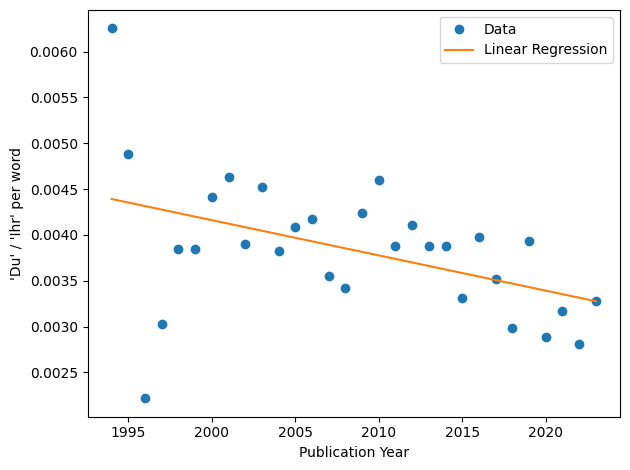

In [92]:
# Visualize the data of 'Du' and 'Ihr' per word
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ihr_ratio_per_word']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' / \'Ihr\' per word')
plt.legend()
plt.savefig('../Visuals/count_du_ihr_per_word.png')
plt.show()

                                OLS Regression Results                                
Dep. Variable:     articles_with_du_ihr_ratio   R-squared:                       0.123
Model:                                    OLS   Adj. R-squared:                  0.091
Method:                         Least Squares   F-statistic:                     3.912
Date:                        Thu, 15 Feb 2024   Prob (F-statistic):             0.0579
Time:                                10:10:33   Log-Likelihood:                 42.746
No. Observations:                          30   AIC:                            -81.49
Df Residuals:                              28   BIC:                            -78.69
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

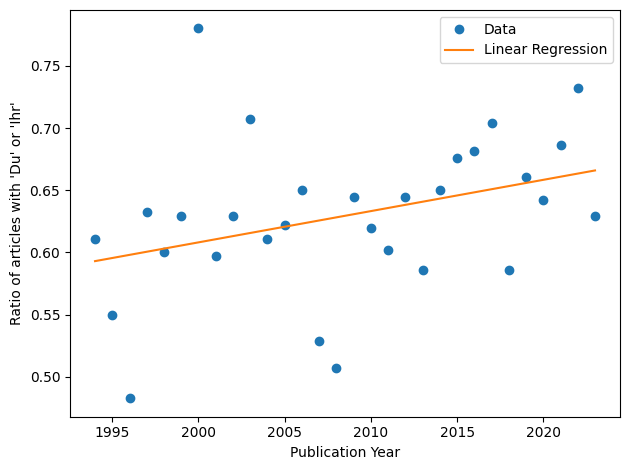

In [93]:
# Visualize the data of articles with 'Du' and 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['articles_with_du_ihr_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with \'Du\' or \'Ihr\'')
plt.legend()
plt.savefig('../Visuals/articles_with_du_ihr_ratrio.png')
plt.show()

### Overview over the usage of 'Sie'

                              OLS Regression Results                             
Dep. Variable:     sie_ratio_per_article   R-squared:                       0.108
Model:                               OLS   Adj. R-squared:                  0.076
Method:                    Least Squares   F-statistic:                     3.388
Date:                   Thu, 15 Feb 2024   Prob (F-statistic):             0.0763
Time:                           10:10:33   Log-Likelihood:                -47.870
No. Observations:                     30   AIC:                             99.74
Df Residuals:                         28   BIC:                             102.5
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

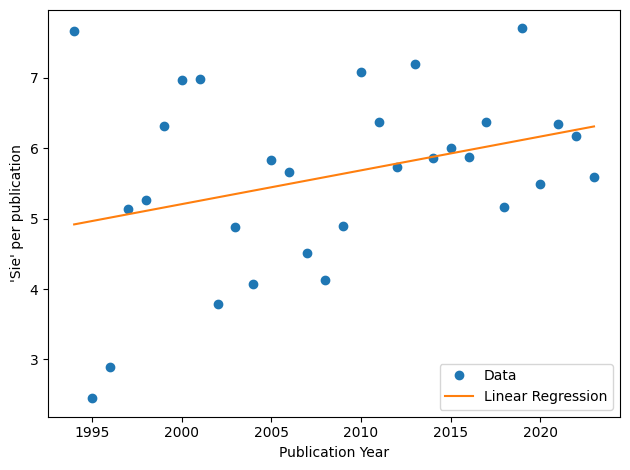

In [94]:
# Visualize the data of 'Sie' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['sie_ratio_per_article']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Sie\' per publication')
plt.legend()
plt.savefig('../Visuals/count_sie_per_publication.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:     sie_ratio_per_word   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.186
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.285
Time:                        10:10:33   Log-Likelihood:                 153.81
No. Observations:                  30   AIC:                            -303.6
Df Residuals:                      28   BIC:                            -300.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0787      0.063  

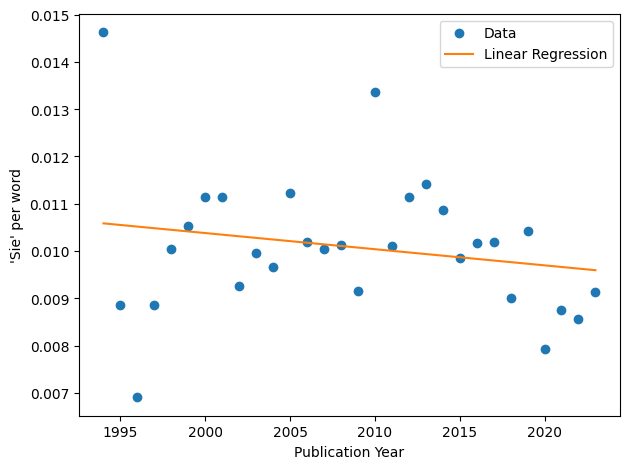

In [95]:
# Visualize the data of 'Sie' per word
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['sie_ratio_per_word']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Sie\' per word')
plt.legend()
plt.savefig('../Visuals/count_sie_per_word.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     articles_with_sie_ratio   R-squared:                       0.015
Model:                                 OLS   Adj. R-squared:                 -0.020
Method:                      Least Squares   F-statistic:                    0.4228
Date:                     Thu, 15 Feb 2024   Prob (F-statistic):              0.521
Time:                             10:10:33   Log-Likelihood:                 49.971
No. Observations:                       30   AIC:                            -95.94
Df Residuals:                           28   BIC:                            -93.14
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

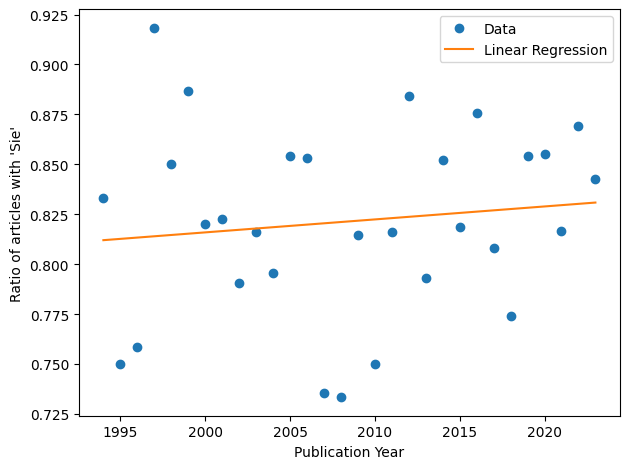

In [96]:
# Visualize the data of articles with 'Sie' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['articles_with_sie_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with \'Sie\'')
plt.legend()
plt.savefig('../Visuals/articles_with_sie_ratrio.png')
plt.show()

### Overview over the combined usage

In [97]:
'''# Visualize the data of all pronouns per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['all_ratio_per_article']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Pronouns per publication')
plt.legend()
plt.savefig('../Visuals/count_all_per_publication.png')
plt.show()'''

'# Visualize the data of all pronouns per publication\n# Fit a linear regression curve to the data\nX = sm.add_constant(df_yearly_overview[\'publication_year\'])\ny = df_yearly_overview[\'all_ratio_per_article\']\nmodel = sm.OLS(y.astype(float), X.astype(float))\nresults = model.fit()\nprint(results.summary())\n\n# Print the confidence intervals for the coefficients\nconf_int = results.conf_int()\nprint("\nConfidence Intervals for the Coefficients:")\nprint(conf_int)\n\n# Plot the data points and the linear regression curve\nplt.plot(df_yearly_overview[\'publication_year\'], y, \'o\', label=\'Data\')\nplt.plot(df_yearly_overview[\'publication_year\'], results.predict(X), label=\'Linear Regression\')\nplt.xlabel(\'Publication Year\')\nplt.ylabel(\'Pronouns per publication\')\nplt.legend()\nplt.savefig(\'../Visuals/count_all_per_publication.png\')\nplt.show()'

In [98]:
'''# Visualize the data of all pronouns per word
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['all_ratio_per_word']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Pronouns per word')
plt.legend()
plt.savefig('../Visuals/count_all_per_word.png')
plt.show()'''

'# Visualize the data of all pronouns per word\n# Fit a linear regression curve to the data\nX = sm.add_constant(df_yearly_overview[\'publication_year\'])\ny = df_yearly_overview[\'all_ratio_per_word\']\nmodel = sm.OLS(y.astype(float), X.astype(float))\nresults = model.fit()\nprint(results.summary())\n\n# Print the confidence intervals for the coefficients\nconf_int = results.conf_int()\nprint("\nConfidence Intervals for the Coefficients:")\nprint(conf_int)\n\n# Plot the data points and the linear regression curve\nplt.plot(df_yearly_overview[\'publication_year\'], y, \'o\', label=\'Data\')\nplt.plot(df_yearly_overview[\'publication_year\'], results.predict(X), label=\'Linear Regression\')\nplt.xlabel(\'Publication Year\')\nplt.ylabel(\'Pronouns per word\')\nplt.legend()\nplt.savefig(\'../Visuals/count_all_per_word.png\')\nplt.show()'

                               OLS Regression Results                              
Dep. Variable:     articles_with_all_ratio   R-squared:                       0.007
Model:                                 OLS   Adj. R-squared:                 -0.029
Method:                      Least Squares   F-statistic:                    0.1864
Date:                     Thu, 15 Feb 2024   Prob (F-statistic):              0.669
Time:                             10:10:34   Log-Likelihood:                 51.147
No. Observations:                       30   AIC:                            -98.29
Df Residuals:                           28   BIC:                            -95.49
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

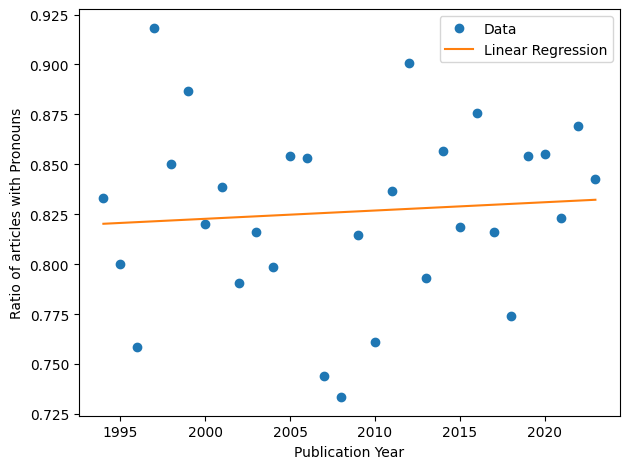

In [99]:
# Visualize the data of articles with at least one pronoun per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['articles_with_all_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with Pronouns')
plt.legend()
plt.savefig('../Visuals/articles_with_all_ratrio.png')
plt.show()

### Correlation Analysis

In [109]:
df.head()

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,...,all_count,has_du,has_ihr,has_du_ihr,has_sie,has_all,du_ratio_per_word,ihr_ratio_per_word,du_ihr_ratio_per_word,sie_ratio_per_word
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,777,"(Wenn, Großbritannien, Ende, März, den, Aussti...",7,...,11,False,True,True,True,True,0.0,0.006435,0.006435,0.007722
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,718,"(Fleisch, aus, dem, Labor, ist, noch, eine, Zu...",0,...,6,False,True,True,True,True,0.0,0.001393,0.001393,0.006964
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,618,"(Die, AP, Weltnachrichten, haben, heute, unter...",0,...,11,False,True,True,True,True,0.0,0.006472,0.006472,0.011327
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen m...,224,"(Maastricht, (, AP, ), -, Das, niederländische...",0,...,0,False,False,False,False,False,0.0,0.000000,0.000000,0.000000
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,638,"(Die, Weltbevölkerung, wächst, ,, die, Nachfra...",2,...,1,False,False,False,True,True,0.0,0.000000,0.000000,0.001567


In [110]:
# Correlation between number of questions and number of 'Du' or 'Ihr' per article
print(df['questions_count'].corr(df['du_ihr_count']))

# Correlation between number of questions and number of 'Sie' per article
print(df['questions_count'].corr(df['sie_count']))

0.36135860817381255
0.5085572446847143


In [111]:
df['du_ratio_per_word'] = df['du_count'] / df['word_count']
df['ihr_ratio_per_word'] = df['ihr_count'] / df['word_count']
df['du_ihr_ratio_per_word'] = df['du_ihr_count'] / df['word_count']
df['sie_ratio_per_word'] = df['sie_count'] / df['word_count']

In [112]:
# Correlation between number of questions and number of 'Du' or 'Ihr' per character/word
print(df['questions_ratio'].corr(df['du_ihr_ratio_per_word']))

# Correlation between number of questions and number of 'Sie' per character/word
print(df['questions_ratio'].corr(df['sie_ratio_per_word']))

0.030941632010382795
0.13339817822817615


In [113]:
# Correlation between the existence of 'Du' or 'Ihr' and the existence of questions
print(df['questions_bool'].corr(df['has_du_ihr']))

# Correlation between the existence of 'Sie' and the existence of questions
print(df['questions_bool'].corr(df['has_sie']))

# Correlation between the existence of 'Du' or 'Ihr' or 'Sie' and the existence of questions
print(df['questions_bool'].corr(df['has_all']))

0.2422482843702462
0.21289571361140766
0.21605021269308647
